# Importações e carregamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Normalização/Padronização
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Classificação
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Regressão
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

# Métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_percentage_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# %cd /content/drive/My Drive/desafio_alelo/

/content/drive/My Drive/desafio_alelo


In [4]:
df1 = pd.read_csv('heroes_information.csv', index_col=0)
df2 = pd.read_csv('super_hero_powers.csv')

In [5]:
df2.head(1)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df1.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [7]:
df2.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df1.shape, df2.shape

((734, 10), (667, 168))

In [9]:
df1.shape[0] - df2.shape[0]

67

In [10]:
# Análise da diferença da quantidade destes super-heróis
sorted(list(set(df1['name']) - set(df2['hero_names'])))

['Agent 13',
 'Alfred Pennyworth',
 'Arsenal',
 'Batgirl III',
 'Batgirl V',
 'Beetle',
 'Black Goliath',
 'Black Widow II',
 'Blaquesmith',
 'Bolt',
 'Boomer',
 'Box',
 'Box III',
 'Captain Mar-vell',
 'Cat II',
 'Cecilia Reyes',
 'Clea',
 'Clock King',
 'Colin Wagner',
 'Colossal Boy',
 'Corsair',
 'Cypher',
 'Danny Cooper',
 'Darkside',
 'ERG-1',
 'Fixer',
 'Franklin Storm',
 'Giant-Man',
 'Giant-Man II',
 'Goliath',
 'Guardian',
 'Hawkwoman',
 'Hawkwoman II',
 'Hawkwoman III',
 'Howard the Duck',
 'Jack Bauer',
 'Jesse Quick',
 'Jessica Sanders',
 'Jigsaw',
 'Jyn Erso',
 'Kid Flash II',
 'Kingpin',
 'Meteorite',
 'Mister Zsasz',
 'Mogo',
 'Moloch',
 'Morph',
 'Nite Owl II',
 'Omega Red',
 'Paul Blart',
 'Penance',
 'Penance I',
 'Plastic Lad',
 'Power Man',
 'Renata Soliz',
 'Ronin',
 'Shrinking Violet',
 'Snake-Eyes',
 'Spider-Carnage',
 'Spider-Woman II',
 'Stacy X',
 'Thunderbird II',
 'Two-Face',
 'Vagabond',
 'Vision II',
 'Vulcan',
 'Warbird',
 'White Queen',
 'Wiz Kid',
 'Wo

In [11]:
df2.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

# Clustering

## Questão 1

Primeiro, queremos agrupar nossos super-heróis de acordo com seus poderes e informações. Execute um método de cluster não supervisionado usando o número de clusters que você julgar mais apropriado.

- Qual algoritmo você escolheu e por quê?
- Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia de recursos (seleção) que você executou.

## Questão 2

Um dos desafios do clustering é definir o número certo de clusters. Como você escolheu esse número? Como você avalia a qualidade dos clusters finais?

In [12]:
# Gera um conjunto de dados de exemplo
X = df2.copy()
X = X.drop(columns=['hero_names'])

Número de clusters: 2, Índice de Silhueta: 0.155
Número de clusters: 3, Índice de Silhueta: 0.108
Número de clusters: 4, Índice de Silhueta: 0.113
Número de clusters: 5, Índice de Silhueta: 0.115
Número de clusters: 6, Índice de Silhueta: 0.111
Número de clusters: 7, Índice de Silhueta: 0.108
Número de clusters: 8, Índice de Silhueta: 0.074
Número de clusters: 9, Índice de Silhueta: 0.072
Número de clusters: 10, Índice de Silhueta: 0.067
Número de clusters: 11, Índice de Silhueta: 0.065
Número de clusters: 12, Índice de Silhueta: 0.064
Número de clusters: 13, Índice de Silhueta: 0.062
Número de clusters: 14, Índice de Silhueta: 0.061
Número de clusters: 15, Índice de Silhueta: 0.061
Número de clusters: 16, Índice de Silhueta: 0.061
Número de clusters: 17, Índice de Silhueta: 0.057
Número de clusters: 18, Índice de Silhueta: 0.058
Número de clusters: 19, Índice de Silhueta: 0.061
Número de clusters: 20, Índice de Silhueta: 0.060
Número de clusters: 21, Índice de Silhueta: 0.084
Número d

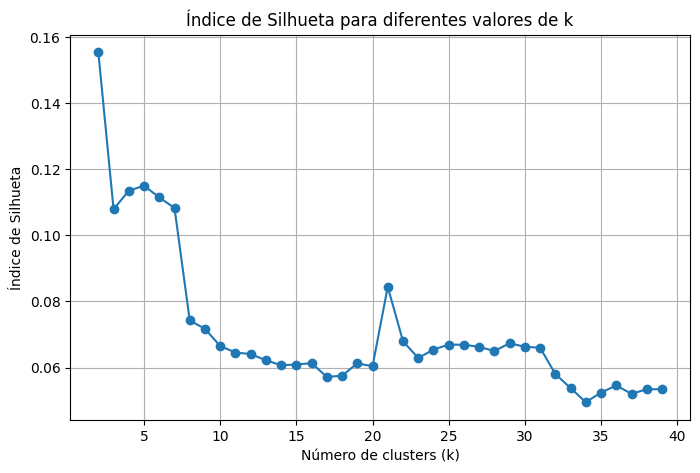


O melhor número de clusters é: 2


In [13]:
silhouette_scores = []

# Executa K-Means para cada valor de k e calcular o índice de silhueta
for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f'Número de clusters: {k}, Índice de Silhueta: {score:.3f}')

# Plot do índice de silhueta para cada valor de k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 40), silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.title('Índice de Silhueta para diferentes valores de k')
plt.grid(True)
plt.show()

# Identifica o melhor valor de k
best_k = range(2, 40)[silhouette_scores.index(max(silhouette_scores))]
print(f'\nO melhor número de clusters é: {best_k}')

In [14]:
# Reexecuta o K-Means com o melhor número de clusters
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
df2['cluster'] = kmeans_best.fit_predict(X)

In [15]:
df2.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,cluster
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


# Resposta:

Foi escolhido o K-Means por ser um algoritmo de agrupamento popular e amplamente utilizado, possui as vantagens de ser simples e fácil de implementar, boa eficiência computacional com rápida convergência, versátil e fácil de interpretar.

O único pré-processamento que fiz no dataframe df2 foi retirar a coluna 'hero_names' com os nomes dos super-heróis.

Utilizei a técnica de silhueta para avaliar a qualidade do agrupamento feito pelo K-Means. O índice de silhueta quantifica a qualidade dos agrupamentos de um conjunto de dados, combinando a coesão do grupo e a separação entre os clusters para medir quão bem um ponto de dados se encaixa no seu próprio cluster em comparação com outros clusters. O índice de silhueta fornece uma maneira de avaliar tanto a consistência dentro dos clusters quanto a distinção entre clusters.

# Identificando os bandidos

Nesta seção, lidaremos com o problema de aprendizagem supervisionada. Mais concretamente, iremos formular uma tarefa de classificação, e nosso alvo é o alinhamento dos super-heróis (bom ou mau).

## Questão 3

Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer pré-processamento e engenharia de recursos que você aplicou no processo.

-   Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?
-   Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?
-   Como você avalia os resultados?


### ETL

In [16]:
df1

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [17]:
df1.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [18]:
len(df1[df1['Weight'] < 0]), len(df1[df1['Height'] < 0]), len(df1[(df1['Weight'] < 0) & (df1['Height'] < 0)])

(237, 217, 212)

Há valores negativos para o peso (Weight), provavelmente por não esta informação não conter na base. Excluindo todos os valores negativos:

In [19]:
df_w = df1[(df1['Weight'] > 0) & (df1['Height'] > 0)] # Pegando apenas valores positivos de peso e altura

In [20]:
len(df_w)

490

### Tratando valores duplicados:

In [21]:
duplicates_based_on_name = df_w[df_w.duplicated(subset=['name'], keep=False)]
duplicates_based_on_name

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
96,Black Canary,Female,blue,Human,Blond,165.0,DC Comics,-,good,58.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
155,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,-,good,74.0
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
496,Nova,Male,brown,Human,Brown,185.0,Marvel Comics,-,good,86.0
497,Nova,Female,white,Human / Cosmic,Red,163.0,Marvel Comics,gold,good,59.0


Para os super-heróis duplicados foi feito a média do valor do peso para a modelagem:

In [22]:
df_combined = pd.DataFrame(columns=df_w.columns)

for i in duplicates_based_on_name['name'].unique():
    df_temp = duplicates_based_on_name[duplicates_based_on_name['name'] == i] # Filtra um conjunto com os valores duplicados pelo nome
    mean_weight = df_temp['Weight'].mean() # Obtém a média para aquele super-herói
    df_filtered = df_temp.head(1)
    df_filtered['Weight'] = mean_weight
    df_combined = pd.concat([df_combined, df_filtered], ignore_index=True)

<ipython-input-22-15e3974a6483>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Weight'] = mean_weight
<ipython-input-22-15e3974a6483>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df_filtered], ignore_index=True)


In [23]:
df_combined

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,113.5
1,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,86.0
2,Black Canary,Female,blue,Human,Blond,165.0,DC Comics,-,good,58.5
3,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,-,good,87.5
4,Nova,Male,brown,Human,Brown,185.0,Marvel Comics,-,good,72.5
5,Spider-Man,Male,hazel,Human,Brown,178.0,Marvel Comics,-,good,69.0
6,Toxin,Male,blue,Symbiote,Brown,188.0,Marvel Comics,-,good,107.0


In [24]:
duplicates_based_on_name.index

Index([47, 48, 68, 69, 96, 97, 155, 156, 496, 497, 622, 623, 624, 673, 674], dtype='int64')

In [25]:
# Apaga do dataframe todos os índices duplicados e insere os valores do peso tratados em df_combined:
df_w = df_w.drop(duplicates_based_on_name.index)
df_w = df_w.reset_index(drop=True)
df_w = pd.concat([df_w, df_combined], ignore_index=True)

In [26]:
len(df_w)

482

In [27]:
df_w[df_w.duplicated(subset=['name'], keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [28]:
df_w.describe()

,Height,Weight
count,482.000000,482.000000
mean,187.267012,112.665975
std,59.441373,105.175986
min,15.200000,4.000000
25%,175.000000,61.000000
50%,183.000000,81.000000
75%,188.000000,107.750000
max,975.000000,900.000000


In [29]:
df_w[df_w['Height'] < 0]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


### Variáveis Dummy

In [30]:
df_encoded = pd.get_dummies(df_w, columns=['Gender'])
df_encoded = pd.get_dummies(df_encoded, columns=['Race'])

In [31]:
df_encoded

,name,Eye color,Hair color,Height,Publisher,Skin color,Alignment,Weight,Gender_-,Gender_Female,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
0,A-Bomb,yellow,No Hair,203.0,Marvel Comics,-,good,441.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,blue,No Hair,191.0,Dark Horse Comics,blue,good,65.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,blue,No Hair,185.0,DC Comics,red,good,90.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Abomination,green,No Hair,203.0,Marvel Comics,-,bad,441.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,blue,No Hair,193.0,Marvel Comics,-,bad,122.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Black Canary,blue,Blond,165.0,DC Comics,-,good,58.5,False,True,...,False,False,False,False,False,False,False,False,False,False
478,Captain Marvel,blue,Blond,180.0,Marvel Comics,-,good,87.5,False,True,...,False,False,False,False,False,False,False,False,False,False
479,Nova,brown,Brown,185.0,Marvel Comics,-,good,72.5,False,False,...,False,False,False,False,False,False,False,False,False,False
480,Spider-Man,hazel,Brown,178.0,Marvel Comics,-,good,69.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df_encoded = df_encoded.drop(['Gender_-', 'Race_-'], axis=1)

In [33]:
df_encoded

,name,Eye color,Hair color,Height,Publisher,Skin color,Alignment,Weight,Gender_Female,Gender_Male,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
0,A-Bomb,yellow,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,blue,No Hair,191.0,Dark Horse Comics,blue,good,65.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,blue,No Hair,185.0,DC Comics,red,good,90.0,False,True,...,False,False,False,True,False,False,False,False,False,False
3,Abomination,green,No Hair,203.0,Marvel Comics,-,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,blue,No Hair,193.0,Marvel Comics,-,bad,122.0,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Black Canary,blue,Blond,165.0,DC Comics,-,good,58.5,True,False,...,False,False,False,False,False,False,False,False,False,False
478,Captain Marvel,blue,Blond,180.0,Marvel Comics,-,good,87.5,True,False,...,False,False,False,False,False,False,False,False,False,False
479,Nova,brown,Brown,185.0,Marvel Comics,-,good,72.5,False,True,...,False,False,False,False,False,False,False,False,False,False
480,Spider-Man,hazel,Brown,178.0,Marvel Comics,-,good,69.0,False,True,...,False,False,False,False,False,False,False,False,False,False


### Padronização dos dados de altura e peso

In [34]:
# Inicializa o StandardScaler
scaler = StandardScaler()

# Padroniza a coluna 'altura' e 'peso'
df_encoded[['Height', 'Weight']] = scaler.fit_transform(df_encoded[['Height', 'Weight']])

In [35]:
df_encoded

,name,Eye color,Hair color,Height,Publisher,Skin color,Alignment,Weight,Gender_Female,Gender_Male,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
0,A-Bomb,yellow,No Hair,0.264956,Marvel Comics,-,good,3.125002,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,blue,No Hair,0.062866,Dark Horse Comics,blue,good,-0.453673,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,blue,No Hair,-0.038178,DC Comics,red,good,-0.215729,False,True,...,False,False,False,True,False,False,False,False,False,False
3,Abomination,green,No Hair,0.264956,Marvel Comics,-,bad,3.125002,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,blue,No Hair,0.096548,Marvel Comics,-,bad,0.088839,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Black Canary,blue,Blond,-0.374994,DC Comics,-,good,-0.515538,True,False,...,False,False,False,False,False,False,False,False,False,False
478,Captain Marvel,blue,Blond,-0.122382,Marvel Comics,-,good,-0.239524,True,False,...,False,False,False,False,False,False,False,False,False,False
479,Nova,brown,Brown,-0.038178,Marvel Comics,-,good,-0.382290,False,True,...,False,False,False,False,False,False,False,False,False,False
480,Spider-Man,hazel,Brown,-0.156064,Marvel Comics,-,good,-0.415602,False,True,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df_encoded.Alignment.unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

Verificando o alinhamento do tipo "-" e "neutral"

In [37]:
df_encoded[df_encoded['Alignment'] == '-']

,name,Eye color,Hair color,Height,Publisher,Skin color,Alignment,Weight,Gender_Female,Gender_Male,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
23,Anti-Venom,blue,Blond,0.702816,Marvel Comics,-,-,2.335028,False,True,...,True,False,False,False,False,False,False,False,False,False
68,Blackwulf,red,White,0.012344,Marvel Comics,-,-,-0.234765,False,True,...,False,False,False,False,False,False,False,False,False,False
428,Trickster,blue,Blond,-0.071860,DC Comics,-,-,-0.301389,False,True,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df_encoded[df_encoded['Alignment'] == 'neutral']

,name,Eye color,Hair color,Height,Publisher,Skin color,Alignment,Weight,Gender_Female,Gender_Male,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
55,Bizarro,black,Black,0.062866,DC Comics,white,neutral,0.402925,False,True,...,False,False,False,False,False,False,False,False,False,False
108,Copycat,red,White,-0.071860,Marvel Comics,blue,neutral,-0.434637,True,False,...,False,False,False,False,False,False,False,False,False,False
125,Deadpool,brown,No Hair,0.012344,Marvel Comics,-,neutral,-0.168140,False,True,...,False,False,False,False,False,False,False,False,False,False
128,Deathstroke,blue,White,0.096548,DC Comics,-,neutral,-0.111034,False,True,...,False,False,False,False,False,False,False,False,False,False
149,Etrigan,red,No Hair,0.096548,DC Comics,yellow,neutral,0.859777,False,True,...,False,False,False,False,False,False,False,False,False,False
170,Galactus,black,Black,11.598799,Marvel Comics,-,neutral,-0.920043,False,True,...,False,False,False,False,False,False,False,False,False,False
176,Gladiator,blue,Blue,0.180752,Marvel Comics,purple,neutral,1.478431,False,True,...,False,False,False,False,False,False,False,False,False,False
236,Juggernaut,blue,Red,1.679581,Marvel Comics,-,neutral,7.065351,False,True,...,False,False,False,False,False,False,False,False,False,False
257,Lobo,red,Black,0.702816,DC Comics,blue-white,neutral,1.668786,False,True,...,False,False,False,False,False,False,False,False,False,False
340,Raven,indigo,Black,-0.374994,DC Comics,-,neutral,-0.596439,True,False,...,False,False,False,False,False,False,False,False,False,False


### Label Encoding para a coluna Alignment

Como o objetivo são os super-heróis bons ou maus, irei excluir do conjunto de dados os que possuem alinhamento neutro ou que não esta informação inserida ('-').

In [39]:
df_encoded = df_encoded[df_encoded['Alignment'] != '-']
df_encoded = df_encoded[df_encoded['Alignment'] != 'neutral']

In [40]:
df_encoded.Alignment.unique()

array(['good', 'bad'], dtype=object)

In [41]:
# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Aplica o LabelEncoder na coluna 'Alignment'
df_encoded['Alignment'] = label_encoder.fit_transform(df_encoded['Alignment'])

In [42]:
df_encoded.Alignment.unique()

array([1, 0])

In [43]:
df_encoded.head()

,name,Eye color,Hair color,Height,Publisher,Skin color,Alignment,Weight,Gender_Female,Gender_Male,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
0,A-Bomb,yellow,No Hair,0.264956,Marvel Comics,-,1,3.125002,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,blue,No Hair,0.062866,Dark Horse Comics,blue,1,-0.453673,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,blue,No Hair,-0.038178,DC Comics,red,1,-0.215729,False,True,...,False,False,False,True,False,False,False,False,False,False
3,Abomination,green,No Hair,0.264956,Marvel Comics,-,0,3.125002,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,blue,No Hair,0.096548,Marvel Comics,-,0,0.088839,False,True,...,False,False,False,False,False,False,False,False,False,False


In [44]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping # Dicionário com o mapeamento dos rótulos do encoder

{'bad': 0, 'good': 1}

Exportanto os dados tratados

In [45]:
# df_encoded_export = df_encoded.copy()

# df_encoded_export['Alignment'] = label_encoder.inverse_transform(df_encoded_export['Alignment'])
# df_encoded_export.to_csv('df_encoded_classification.csv', index=False)

# from google.colab import files
# files.download('df_encoded_classification.csv')

### Feature Engineering

Colunas para a modelagem: Gender, Race, Height, Alignment.

Assim, estou desconsiderando as colunas: Name, Eye color, Hair color, Publisher, Skin color.

In [46]:
df_encoded_filtered = df_encoded.drop(columns=['name', 'Eye color', 'Hair color', 'Publisher', 'Skin color'])

## Modelagens

In [47]:
def confusion_matrix_plot(cm, rotulos):
    # Cria um DataFrame da matriz de confusão
    cm_df = pd.DataFrame(cm, index=rotulos, columns=rotulos)

    # Visualiza o mapa de calor
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=rotulos, yticklabels=rotulos)
    plt.title('Matriz de Confusão')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.show()

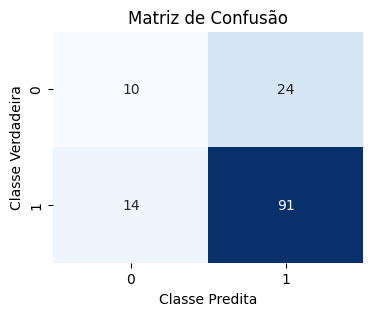


Classification Report: 

              precision    recall  f1-score   support

           0       0.42      0.29      0.34        34
           1       0.79      0.87      0.83       105

    accuracy                           0.73       139
   macro avg       0.60      0.58      0.59       139
weighted avg       0.70      0.73      0.71       139



In [48]:
# Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_encoded_filtered.drop(columns=['Alignment']), df_encoded['Alignment'], test_size=0.3, random_state=42)

# Cria o classificador Naive Bayes
model = BernoulliNB()

# Treino do modelo
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

classes = ['0', '1']

# Avalia o modelo
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm, classes)

report = classification_report(y_test, y_pred, target_names=classes)
print(f'\nClassification Report: \n\n{report}')

In [49]:
# # Exportação dos dados e modelo
# df_encoded.to_csv('df_encoded_classification.csv', index=False)

# import joblib
# joblib.dump(model, 'model_classification.pkl')

# from google.colab import files
# files.download('df_encoded_classification.csv')
# files.download('model_classification.pkl')

## Respostas:

- Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?

A principal hipótese do Naive Bayes é que os atributos são condicionalmente independentes umas das outras dado a classe. Ou seja, dado que sabemos a classe a que um exemplo pertence, o valor de um atributo não fornece nenhuma informação adicional sobre as outras características. Outra hipótese que assumimos é com relação à distribuição dos dados, se seguem uma distribuição normal (Gaussian Naive Bayes), multinomial ou Bernoulli para features do tipo binárias.

- Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?

Este conjunto de dados, por ter todas as features do tipo binário (True ou False), foi utilizado o Bernoulli Naive Bayes.

- Como você avalia os resultados?

No conjunto de teste temos 34 exemplos com a classe 0 e 105 com a classe 1. Pela matriz de confusão podemos ver que o modelo acertou mais para a classe 1 que para a classe 0. Dos 105 exemplos da classe 1, acertou apenas 14. E da classe 0 acertou 10 de 34.

Pelo *classification report* podemos ver que o modelo possui **Precisão** de 42% e 79% para as classes 0 e 1, respectivamente. Para a classe 0, acertou 10 (*True Positive*) de 24 (10 *True Positive* + 14 *False Positive*), para a classe 1 acertou 91 de 115 (91 *True Positive* + 24 *False Positive*) . Esta métrica mede a proporção de exemplos que foram classificados pelo modelo como positivo e que são de fato positivos.

O **Recall** foi de 29% e 87% para as classes 0 e 1, respectivamente. Ela mede a proporção de exemplos positivos corretamente identificados pelo modelo em relação à quantidade de exemplos daquela classe.

Temos também a **F1-Score** que combina, numa média harmônica, a precisão e o recall, especialmente útil quando você precisamos de um balanço entre as duas.

A **Acurácia** foi de 0.73 ($\frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}$), que significa a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo.

Ainda no *classification report*, o **Macro Average** é a média não ponderada das métricas para cada classe, tratando cada classe igualmente, fazendo uma média da precisão pela quantidade de classes. Já o **Weighted Average** é a média ponderada das métricas, ajustada pelo suporte (quantidade de exemplos cada classe).

# Questão 4

Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado para essa tarefa.

1. O que motivou sua escolha do algoritmo?    
2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem?

In [50]:
#%pip install dask

In [51]:
def model_train(model_name, model_in, X_train, y_train, X_test, y_test, classes_names):
    model = model_in()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=classes_names)
    accuracy = accuracy_score(y_test, y_pred)
    print('###########################################################\n')
    print(f'Model: {model_name}\n')
    print(f'Acurácia: {accuracy}\n')
    print(f'Classification Report: \n\n{report}')
    return accuracy

In [52]:
classes = list(map(str, df_encoded['Alignment'].unique()))
models = {'SVC': SVC, 'Gradient Boosting': GradientBoostingClassifier, 'XGBoost': XGBClassifier, 'LightGBM': LGBMClassifier, 'Multilayer Perceptron': MLPClassifier, 'Logistic Regression': LogisticRegression}

In [53]:
best_accuracy = 0
for model_name, model in models.items():
    acc = model_train(model_name, model, X_train, y_train, X_test, y_test, classes)
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model_name

print(f'\nMelhor modelo: {best_model} com acurácia de {best_accuracy}\n')

###########################################################

Model: SVC

Acurácia: 0.7697841726618705

Classification Report: 

              precision    recall  f1-score   support

           1       0.62      0.15      0.24        34
           0       0.78      0.97      0.86       105

    accuracy                           0.77       139
   macro avg       0.70      0.56      0.55       139
weighted avg       0.74      0.77      0.71       139

###########################################################

Model: Gradient Boosting

Acurácia: 0.7194244604316546

Classification Report: 

              precision    recall  f1-score   support

           1       0.35      0.18      0.24        34
           0       0.77      0.90      0.83       105

    accuracy                           0.72       139
   macro avg       0.56      0.54      0.53       139
weighted avg       0.67      0.72      0.68       139

###########################################################

Model: XGBoost


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


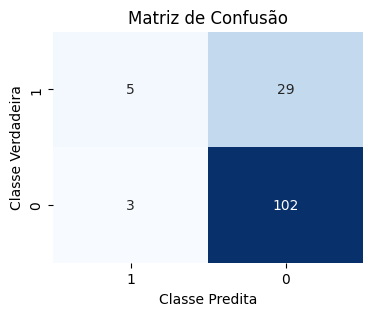

Classification Report: 

              precision    recall  f1-score   support

           1       0.62      0.15      0.24        34
           0       0.78      0.97      0.86       105

    accuracy                           0.77       139
   macro avg       0.70      0.56      0.55       139
weighted avg       0.74      0.77      0.71       139



In [54]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(cm, classes)

report = classification_report(y_test, y_pred, target_names=classes)
print(f'Classification Report: \n\n{report}')

## Respostas - Questão 4

1. O que motivou sua escolha do algoritmo?

Por ter obtido melhor resultado comparado com outros modelos de classificação, o modelo **Support Vector Machine** obteve **0.77** de **Acurácia**, **0.62** e **0.78** de **Precisão** para as classes 0 e 1, respectivamente. A precisão da classe 0 melhorou (antes de 0.42) e a da classe 1 caiu pouco (antes de 0.79), mas aumenta a acurácia do modelo (antes de 0.73).

2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem?

O algoritmo da Regressão Logística é baseado em um modelo linear. Ele usa uma função logística (ou sigmóide) para modelar a probabilidade de uma amostra pertencer a uma classe específica. O modelo faz isso ajustando os pesos (coeficientes) das features para maximizar a verossimilhança dos dados, com objetivo de minimizar a função de custo, geralmente a Entropia Cruzada (ou Log Loss), para encontrar os melhores coeficientes.

Já o Naive Bayes é baseado no Teorema de Bayes, que usa a probabilidade condicional para classificar amostras. Assume que as características são independentes entre si, o que é uma simplificação (daí o termo "naive", ingênuo). É feito o cálculo da probabilidade de uma amostra pertencer a cada classe com base na probabilidade das características, assumindo independência condicional entre elas, com objetivo de classificar baseado na probabilidade posterior máxima.


# Além do bem e do mal - Questão 5

Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.

1. Qual algoritmo você escolheu e por quê?
2. Como você avalia o desempenho do seu algoritmo neste caso?

In [55]:
# Fazendo quase todos os mesmos tratamentos que no exercício anterior, incluindo a variável dummy para Alignment:
df_w2 = df1[(df1['Weight'] > 0) & (df1['Height'] > 0)] # Pegando apenas valores positivos de peso e altura
duplicates_based_on_name2 = df_w2[df_w2.duplicated(subset=['name'], keep=False)] # Tratando valores duplicados
df_combined2 = pd.DataFrame(columns=df_w2.columns)

for i in duplicates_based_on_name2['name'].unique():
    df_temp2 = duplicates_based_on_name2[duplicates_based_on_name2['name'] == i] # Filtra um conjunto com os valores duplicados pelo nome
    mean_weight2 = df_temp2['Weight'].mean() # Obtém a média para aquele super-herói
    df_filtered2 = df_temp2.head(1)
    df_filtered2['Weight'] = mean_weight2
    df_combined2 = pd.concat([df_combined2, df_filtered2], ignore_index=True)

# Apaga do dataframe todos os índices duplicados e insere os valores do peso tratados em df_combined:
df_w2 = df_w2.drop(duplicates_based_on_name2.index)
df_w2 = df_w2.reset_index(drop=True)
df_w2 = pd.concat([df_w2, df_combined2], ignore_index=True)

# Variáveis Dummy
df_encoded2 = pd.get_dummies(df_w2, columns=['Gender'])
df_encoded2 = pd.get_dummies(df_encoded2, columns=['Race'])
df_encoded2 = pd.get_dummies(df_encoded2, columns=['Alignment'])

df_encoded2 = df_encoded2.drop(['Gender_-', 'Race_-', 'Alignment_-'], axis=1)

# Padronização dos dados de altura e peso
# Inicializa o StandardScaler
scaler = StandardScaler()

# Padroniza a coluna 'altura' e 'peso'
df_encoded2[['Weight', 'Height']] = scaler.fit_transform(df_encoded2[['Weight', 'Height']])

<ipython-input-55-be38cd65432a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['Weight'] = mean_weight2
<ipython-input-55-be38cd65432a>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined2 = pd.concat([df_combined2, df_filtered2], ignore_index=True)


In [56]:
df_encoded2_clean = df_encoded2.drop(columns=['name', 'Eye color', 'Hair color', 'Publisher', 'Skin color']) # Feature Engineering

## Modelagens

In [57]:
df_encoded2_clean.head()

,Height,Weight,Gender_Female,Gender_Male,Race_Alien,Race_Amazon,Race_Android,Race_Animal,Race_Asgardian,Race_Atlantean,...,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie,Alignment_bad,Alignment_good,Alignment_neutral
0,0.264956,3.125002,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.062866,-0.453673,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-0.038178,-0.215729,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0.264956,3.125002,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.096548,0.088839,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
X = df_encoded2_clean.drop(columns=['Weight'])
y = df_encoded2_clean['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
models_reg = {'Linear Regression': LinearRegression, 'Ridge': Ridge, 'SVR': SVR, 'Polinomial Features': PolynomialFeatures, 'Decision Tree Regressor': DecisionTreeRegressor}

In [61]:
def train_evaluate_models(model_name, model, X_train, y_train, x_test, y_test):

    # Cria o modelo
    if model_name == 'Polinomial Features':
        poly = PolynomialFeatures(degree=3)
        model = make_pipeline(poly, LinearRegression())
    else:
        model = model()

    # Treina
    model.fit(X_train, y_train)

    # Faz a previsão
    y_pred = model.predict(X_test)

    # Cálculos das métricas de avaliação:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return model_name, model, mse, mae, rmse, mape

In [62]:
df_results_reg = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'RMSE', 'MAPE'])
best_mse = float('inf')
best_model = None
best_model_name = None

# Loop para treinar vários modelos
for model_name, model in models_reg.items():
    model_name, model_out, mse, mae, rmse, mape = train_evaluate_models(model_name, model, X_train, y_train, X_test, y_test)
    if mse < best_mse:
        best_mse = mse
        best_model = model_out
        best_model_name = model_name
    df_results_reg = pd.concat([df_results_reg, pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'MAE': [mae], 'RMSE': [rmse], 'MAPE': [mape]})], ignore_index=True)

<ipython-input-62-aa5b6107437b>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_reg = pd.concat([df_results_reg, pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'MAE': [mae], 'RMSE': [rmse], 'MAPE': [mape]})], ignore_index=True)


In [63]:
best_model_name, best_model

('SVR', SVR())

In [64]:
df_results_reg.sort_values(by=['MSE', 'MAE', 'MAPE'], ascending=True).reset_index(drop=True)

,Model,MSE,MAE,RMSE,MAPE
0,SVR,0.561222,0.300076,0.749147,1.256651
1,Decision Tree Regressor,0.716583,0.338677,0.846512,1.958932
2,Ridge,0.775419,0.449352,0.880579,2.236065
3,Linear Regression,1.136012,0.455674,1.065839,2.417898
4,Polinomial Features,30.773832,1.125321,5.547417,2.350310


In [65]:
# Melhor modelo:
print(f"Melhor modelo: {df_results_reg.sort_values(by=['MSE', 'MAE', 'MAPE'], ascending=True).reset_index(drop=True)['Model'][0]}")

Melhor modelo: SVR


In [66]:
# # Exporta o melhor modelo de regressão
# import joblib
# joblib.dump(best_model, 'model_regression.pkl')

# from google.colab import files
# files.download('model_regression.pkl')

# # Exportação dos dados
# df_encoded2.to_csv('df_encoded_regression.csv', index=False)
# files.download('df_encoded_regression.csv')

# Salvando o StandardScaler em um arquivo
# joblib.dump(scaler, 'scaler.pkl')
# files.download('scaler.pkl')

Agora com otimização de hiperparâmetros com grid search:

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [68]:
# Modelos de regressão
models = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'svr': SVR(),
    'polynomial_regression': Pipeline([
        ('poly', PolynomialFeatures()),  # Regressão Polinomial
        ('linear', LinearRegression())
    ]),
    'decision_tree': DecisionTreeRegressor()
}

# Define o espaço de hiperparâmetros para cada modelo
param_grid = [
    {
        'model': [models['linear_regression']],
    },
    {
        'model': [models['ridge']],
        'model__alpha': [0.1, 1.0, 10.0],
        'model__solver': ['auto', 'svd', 'cholesky']
    },
    {
        'model': [models['svr']],
        'model__kernel': ['linear', 'rbf'],
        'model__C': [0.1, 1.0, 10.0],
        'model__gamma': ['scale', 'auto']
    },
    {
        'model': [models['polynomial_regression']],
        'model__poly__degree': [2, 3, 4],  # Graus do polinômio
        'model__linear__fit_intercept': [True, False]
    },
    {
        'model': [models['decision_tree']],
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    }
]

# Configura o Pipeline
pipeline = Pipeline([
    ('model', LinearRegression())  # O nome 'model' será usado no param_grid
])

# Configura o GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treina o modelo com validação cruzada e otimização de hiperparâmetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [Ridge()], 'model__alpha': [0.1, 1.0, 10.0],
                          'model__solver': ['auto', 'svd', 'cholesky']},
                         {'model': [SVR()], 'model__C': [0.1, 1.0, 10.0],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf']},
                         {'model': [Pipeline(steps=[('poly',
                                                     PolynomialFeatures()),
                                                    ('linear',
                                                     LinearRegression())])],
                          'model__linear__fit_intercept': [True, False],
                          'model__poly__degree': [2, 3, 4]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [3, 5, 10],
                          'model__min_samples_split': [2, 5, 10]}],
             scoring='neg_mean_squared_error')

In [69]:
# Melhores hiperparâmetros e o melhor modelo encontrado
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Melhor modelo:", grid_search.best_estimator_)

# Faz previsões com o melhor modelo
y_pred = grid_search.predict(X_test)

# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print("MSE no conjunto de teste:", mse)

Melhores hiperparâmetros encontrados: {'model': SVR(), 'model__C': 10.0, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Melhor modelo: Pipeline(steps=[('model', SVR(C=10.0))])
MSE no conjunto de teste: 0.4948269246207932


## Respostas - Questão 5

1. Qual algoritmo você escolheu e por quê?

Foi escolhido o Support Vector Machines para Regressão por ter tido o melhor desempenho nesta tarefa de regressão, com os menores valores de erro.

2. Como você avalia o desempenho do seu algoritmo neste caso?

Neste caso o modelo teve um bom desempenho comparado com a tarefa de classificação, o modelo SVR errou bem pouco. Este modelo lida bem com relações não lineares e possíveis outliers, que pode ter sido o caso para esta aderência nos resultados, obtendo melhor capacidade de generalização.

# Análise - Questão 6

Quais aspectos desse conjunto de dados apresentam problemas para agrupamento, classificação e regressão? Como você resolveu esses problemas?

Análises do dataset

In [70]:
len(df1)

734

In [71]:
len(df1[(df1['Weight'] > 0)]), len(df1[(df1['Height'] > 0)])

(495, 517)

In [72]:
len(df1[(df1['Weight'] < 0)]), len(df1[(df1['Height'] < 0)])

(237, 217)

In [73]:
len(df1[(df1['Height'] > 0) & (df1['Weight'] > 0)])

490

In [74]:
len(df1[(df1['Height'] < 0) & (df1['Weight'] < 0)])

212

In [75]:
len(df1[(df1['Height'] > 0) & (df1['Weight'] < 0)])

25

In [76]:
len(df1[(df1['Height'] < 0) & (df1['Weight'] > 0)])

5

In [77]:
len(df1[(df1['Height'] == 0)])

0

In [78]:
len(df1[(df1['Weight'] == 0)])

0

In [79]:
len(df1[df1['Weight'].isnull()])

2

In [80]:
df1[df1['Weight'].isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [81]:
len(df1[df1['Height'].isnull()])

0

Valores duplicados:

In [82]:
df1[df1.duplicated(subset=['name'], keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


In [83]:
df2[df2.duplicated(subset=['hero_names'], keep=False)]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,cluster


In [84]:
df1.Gender.unique()

array(['Male', 'Female', '-'], dtype=object)

In [85]:
len(df1.query('Gender == "Male"'))/len(df1)*100, len(df1.query('Gender == "Female"'))/len(df1)*100, len(df1.query('Gender == "-"'))/len(df1)*100

(68.80108991825612, 27.247956403269757, 3.9509536784741144)

In [86]:
df1.Alignment.unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

In [87]:
len(df1.query('Alignment == "good"'))/len(df1)*100, len(df1.query('Alignment == "bad"'))/len(df1)*100, len(df1.query('Alignment == "neutral"'))/len(df1)*100, len(df1.query('Alignment == "-"'))/len(df1)*100

(67.57493188010899, 28.201634877384198, 3.2697547683923704, 0.9536784741144414)

In [88]:
for i in df1.columns:
    print(i, len(df1[df1[i].isnull()]))

name 0
Gender 0
Eye color 0
Race 0
Hair color 0
Height 0
Publisher 15
Skin color 0
Alignment 0
Weight 2


## Respostas - Questão 6:


O conjunto de dados **heroes_information.csv** possui variáveis categórias e numéricas. As categóricas são: Nome, Gênero, Cor do Olho, Raça, Cor do Cabelo, Cor da Pele, Editora e Alinhamento. A variável Nome não normalmente não é útil para a maioria dos algoritmos de machine learning, pois não fornece informações numéricas ou ordinais. Pode ser usado para identificação, mas não para análise. As demais variáveis categóricas precisam ser convertidas para variáveis dummy (one-hot encoding). Há duas variáveis Numéricas: Altura e Peso. São variáveis numéricas e precisam ser normalizadas ou padronizadas para garantir que estejam na mesma escala, especialmente para algoritmos sensíveis a escalas.

Para o problema de **Agrupamento** (Clustering), podemos utilizar as variáveis numéricas (Altura e Peso), com os dados escalonados, pois a falta de escalonamento pode levar a um agrupamento enviesado, e os dados categóricos com os dados codificados, para a definição dos grupos. Outro ponto importante é lidar com dados ruidosos ou outliers, que podem distorcer os agrupamentos, especialmente em algoritmos baseados em distância.
Neste conjunto de dados vemos que há valores negativos de peso e altura (valor de -99), que devem ser tratados para a tarefa de agrupamento. Apesar de ter buscado na documentação, não há explicação para estes valores, o que provavelmente não havia informação para estes campos e foi atribuído o valor de -99.

Para o problema de **Classificação**, uma distribuição desequilibrada entre classes pode enviesar o modelo, tendenciando a classificação para a classe majoritária. Por exemplo, caso decida criar um modelo considerando a coluna Alinhamento como classe, devemos observar que há mais super-heróis bons (67,57%) que maus (28,20%), há 0.95% como neutros e 3,27% que não foram classificados.
As variáveis categóricas devem ser codificadas, como mencionado acima. E os dados faltantes também podem afetar a qualidade do modelo de classificação. Neste conjunto de dados há poucos exemplos com dados faltantes: a coluna
Publisher com 15 e Weight com 2.

Para o problema de **Regressão**, as variáveis categóricas foram convertidas em formato numérico. A abordagem de codificação deve ser escolhida com cuidado para evitar introduzir variabilidade não desejada no modelo. Outra questão é que muitos modelos de regressão assumem uma relação linear entre as variáveis independentes e a variável dependente. Se a relação for não linear, um modelo linear pode não capturar a relação corretamente. Dos 5 modelos testados, o Support Vector Regressor foi o que obteve os melhores resultados (menores erros). As variáveis numéricas devem ser escaladas para garantir que todas as variáveis contribuam de forma equitativa para a modelagem, como foi feito com o Peso e Altura. Por fim, se houver alta correlação entre variáveis independentes, isso pode afetar a estabilidade e a interpretação dos coeficientes do modelo de regressão.

In [89]:
# !pip freeze > requirements.txt

# from google.colab import files
# files.download('requirements.txt')